In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import re
import datetime as dt

# # visualization
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

# Writing multiple dataframes to worksheets using Pandas and XlsxWriter
import xlsxwriter
import glob

# !pip install xlsxwriter
# !pip install glob

In [2]:
xls = pd.ExcelFile(r'C:\Users\u1-510\Desktop\Python\Untitled Folder\Analysis_Сonversion.xlsx')
df = pd.read_excel(xls, 'Segment')

In [3]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [4]:
df = df.query("(Geo=='KZ') | (Geo=='RU') | (Geo=='UA')")

In [5]:
df = df.query("Network=='Видео на YouTube'")

In [6]:
# Только номер креатива
df['Creo_group'] = df['Creo'].str.split('(\d+)([A-Za-z]+)', expand=True).loc[:,[1]]

In [7]:
def ftd_target(el):
    if el > 0:
        return 1
    else:
        return 0

In [8]:
df['Target'] = df['FTD'].map(ftd_target)

<AxesSubplot:>

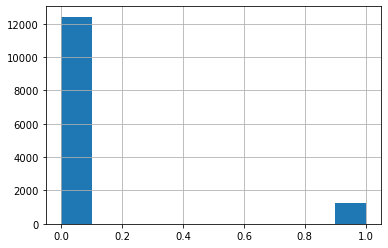

In [9]:
df['Target'].hist()

In [10]:
df.Target.value_counts().reset_index()

,index,Target
0,0,12419
1,1,1261


In [11]:
tgt_train = df.copy()

In [12]:
tgt_train['Campaign'] = tgt_train['ADS'].astype(str) + ' ' +  tgt_train['Camp'].astype(str) + ' ' + tgt_train['Ad_group'].astype(str) + ' ' + tgt_train['Date'].astype(str)

In [13]:
tgt_train = tgt_train.reset_index()

In [14]:
# Словарь класификации
codes_cats = tgt_train.Campaign.astype('category')
dict_cats = dict(enumerate(codes_cats.cat.categories))

In [15]:
# Присвоенные cat.codes
tgt_train['ID'] = tgt_train.Campaign.astype('category').cat.codes

# Розшифровка
#df_group['level_back'] = df_group['ID'].map(dict_cats)

In [16]:
tgt_train.columns

Index(['index', 'Geo', 'Network', 'Optimization', 'Creo', 'Brand',
       'Ad_group_target_CPA', 'ADS', 'Camp', 'Ad_group', 'App', 'Date',
       'Cost_USD', 'Cost', 'Show', 'Clicks', 'Install', 'Firstopen',
       'Registration', 'FTD', 'CPM', 'CPM_segment', 'CPC', 'CPC_segment',
       'Inst_cost', 'Inst_cost_segment', 'Inst_cost_segment_AU_DE',
       'Open_cost', 'Open_cost_segment', 'Open_cost_segment_AU_DE', 'Reg_cost',
       'Reg_cost_segment', 'Reg_cost_segment_AU_DE', 'FTD_cost', 'CTR',
       'CTR_cost_segment', 'CR_click_inst', 'CR_click_inst_segment',
       'CR_inst_open', 'CR_inst_open_segment', 'CR_open_reg',
       'CR_open_reg_segment', 'CR_reg_ftd', 'CR_reg_ftd_segment',
       'CPA_segment', 'Creo_group', 'Target', 'Campaign', 'ID'],
      dtype='object')

In [17]:
tgt_train.drop(['Geo', 'Network', 'Optimization', 'Creo', 'Brand', 'App', 'Date', 'ADS', 'Camp', 'Ad_group',
       'Ad_group_target_CPA', 'Cost_USD', 'Cost', 'Show', 'Clicks', 'Install', 'Firstopen',
       'Registration', 'FTD', 'Inst_cost_segment_AU_DE', 'Open_cost_segment_AU_DE', 
                'Reg_cost_segment_AU_DE', 'FTD_cost', 'CR_reg_ftd', 'CR_reg_ftd_segment', 'Campaign', 'CPA_segment'], axis=1, inplace=True)

In [18]:
tgt_train.columns

Index(['index', 'CPM', 'CPM_segment', 'CPC', 'CPC_segment', 'Inst_cost',
       'Inst_cost_segment', 'Open_cost', 'Open_cost_segment', 'Reg_cost',
       'Reg_cost_segment', 'CTR', 'CTR_cost_segment', 'CR_click_inst',
       'CR_click_inst_segment', 'CR_inst_open', 'CR_inst_open_segment',
       'CR_open_reg', 'CR_open_reg_segment', 'Creo_group', 'Target', 'ID'],
      dtype='object')

In [19]:
tgt_train.CR_inst_open.describe()

count    13680.000000
mean         0.810386
std          1.176064
min          0.000000
25%          0.000000
50%          0.000000
75%          1.400000
max         25.000000
Name: CR_inst_open, dtype: float64

In [20]:
tgt_train.Reg_cost.describe()

count    13680.000000
mean         2.123319
std          4.937910
min          0.000000
25%          0.000000
50%          0.000000
75%          2.510000
max        161.710000
Name: Reg_cost, dtype: float64

In [21]:
tgt_train.Inst_cost.describe()

count    13680.000000
mean         0.756950
std          1.234538
min          0.000000
25%          0.000000
50%          0.240000
75%          1.140000
max         23.450000
Name: Inst_cost, dtype: float64

## Categorical variable encoding

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
cat = ['CPM_segment', 'CPC_segment', 'Inst_cost_segment',  'Open_cost_segment',  'Reg_cost_segment', 
                       'CTR_cost_segment', 'CR_click_inst_segment',  'CR_inst_open_segment', 'CR_open_reg_segment']

In [24]:
x_cat = pd.get_dummies(tgt_train[cat])

## Standardization

In [25]:
from sklearn.preprocessing import StandardScaler
attrs_num = ['CPM', 'CPC', 'CTR', 'Inst_cost', 'Open_cost', 'Reg_cost', 'CR_click_inst', 'CR_inst_open', 'CR_open_reg']
scl = StandardScaler()
x_num = pd.DataFrame(scl.fit_transform(tgt_train[attrs_num]), columns=attrs_num)

In [26]:
train_data = pd.concat([tgt_train[['ID', 'Target']], x_num, x_cat], axis=1)

In [27]:
train_data = train_data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [28]:
train_data

,ID,Target,CPM,CPC,CTR,Inst_cost,Open_cost,Reg_cost,CR_click_inst,CR_inst_open,...,CR_inst_open_segment_151200,CR_inst_open_segment_201250,CR_inst_open_segment_251300,CR_inst_open_segment_301,CR_open_reg_segment_000100,CR_open_reg_segment_101150,CR_open_reg_segment_151200,CR_open_reg_segment_201250,CR_open_reg_segment_251,CR_open_reg_segment_
0,2701,1,-0.249360,0.020136,-0.007813,0.083475,0.323151,0.047933,0.301679,1.181623,...,0,1,0,0,0,1,0,0,0,0
1,2702,0,0.657600,1.933328,-0.161976,-0.613167,-0.533806,-0.430019,-0.639643,-0.689091,...,0,0,0,1,0,0,0,0,0,1
2,2703,0,-0.442647,0.020136,-0.057365,0.083475,0.149936,0.787139,0.301679,0.798977,...,1,0,0,0,0,0,0,0,1,0
3,2704,0,0.097565,-0.430027,0.589568,-0.532162,-0.488223,-0.409767,-0.395777,0.161234,...,0,0,0,0,1,0,0,0,0,0
4,2705,0,-0.452559,-0.167432,0.027975,0.269787,0.455341,0.009454,0.945486,1.011559,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13675,1753,0,5.811909,-0.805162,-0.327150,-0.613167,-0.533806,-0.430019,-0.639643,-0.689091,...,0,0,0,1,0,0,0,0,0,1
13676,1754,0,2.109728,-0.805162,-0.327150,-0.613167,-0.533806,-0.430019,-0.639643,-0.689091,...,0,0,0,1,0,0,0,0,0,1
13677,1755,0,0.023224,-0.805162,-0.327150,-0.613167,-0.533806,-0.430019,-0.639643,-0.689091,...,0,0,0,1,0,0,0,0,0,1
13678,2322,0,3.195106,-0.805162,-0.327150,-0.613167,-0.533806,-0.430019,-0.639643,-0.689091,...,0,0,0,1,0,0,0,0,0,1


## Modeling

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb
from lofo import LOFOImportance, Dataset, plot_importance # to install !pip install lofo-importance
%matplotlib inline
from sklearn.metrics import make_scorer, mean_absolute_error, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV, cross_val_score
import itertools
import optuna

C:\Users\u1-510\Anaconda3\lib\site-packages\lofo\lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [30]:
from sklearn.model_selection import train_test_split

In [32]:
# test_df = train_data.sample(n=199, random_state=7)
# id_test = test_df['ID']
# train = train_data.query("ID not in @id_test")

X = train_data.drop("Target",axis=1)
y = train_data['Target']

print(X.shape, y.shape, train_data.shape)

(13680, 89) (13680,) (13680, 90)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .3,
                                                    random_state = 5,
                                                    stratify = y)

In [36]:
skf = StratifiedKFold(n_splits=5)

cross_val_acc = []

X_train = X_train.values
y_train = y_train.values

for train, test in skf.split(X_train, y_train):
    model.fit(X_train[train], y_train[train])
    cross_val_acc.append(model.score(X_train[test], y_train[test]))
    

print("All of means")
print(cross_val_acc)

print("Mean of scores")
print(np.mean(cross_val_acc))

C:\Users\u1-510\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\u1-510\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\u1-510\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\u1-510\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\u1-510\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:30:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
All of means
[0.907098121085595, 0.9091383812010444, 0.9007832898172323, 0.9122715404699739, 0.9096605744125327]
Mean of scores
0.9077903813972756


In [37]:
gbm = lgb.LGBMClassifier(objective='binary')

gbm.fit(X_train, y_train, eval_set = [(X_test, y_test)],
        early_stopping_rounds=20,
        verbose=10
)

pre = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

print('score', round(accuracy_score(y_test, pre)*100,2), '%')

[10]	valid_0's binary_logloss: 0.218836
[20]	valid_0's binary_logloss: 0.204491
[30]	valid_0's binary_logloss: 0.199794
[40]	valid_0's binary_logloss: 0.199414
[50]	valid_0's binary_logloss: 0.200652
score 91.03 %


C:\Users\u1-510\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\u1-510\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [38]:
# define the validation scheme
cv = KFold(n_splits=4, shuffle=False)
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# define the binary target and the features
target = "Target"
features = train_data.loc[:, 'CPM_segment_0300' : 'CR_open_reg_segment_'].columns
dataset = Dataset(df=train_data, target="Target", features=features)
# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, scoring=scorer, model=model, cv=cv)

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

# plot the means and standard deviations of the importances
# plot_importance(importance_df)

[10:31:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:31:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:31:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

  0%|          | 0/79 [00:00<?, ?it/s]

[10:31:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:31:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:31:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:32:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:32:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:33:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:34:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:34:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:34:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:34:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:35:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:36:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:36:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:37:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:39:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:39:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:39:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:40:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:42:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:43:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:43:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:45:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:45:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:46:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:48:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [39]:
# A parameter grid for XGBoost
params = {
    'n_estimators': [400, 500, 1000],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [4, 6, 8]
}

# define the validation scheme
cv = KFold(n_splits=3, shuffle=True, random_state=None)
scorer = make_scorer(f1_score, greater_is_better=True)

grid = GridSearchCV(estimator=model, 
                    param_grid=params, 
                    scoring=scorer, 
                    n_jobs=-1, 
                    cv=cv, 
                    verbose=1 )
grid.fit(X, y)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\u1-510\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

 Best score:
-0.2777124503149371

 Best

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[11:05:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix, without normalization
[[12419     0]
 [    0  1261]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


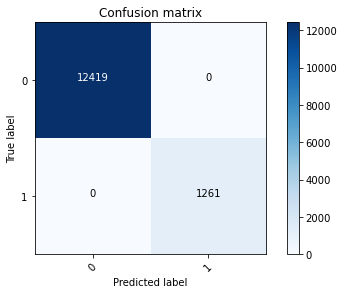

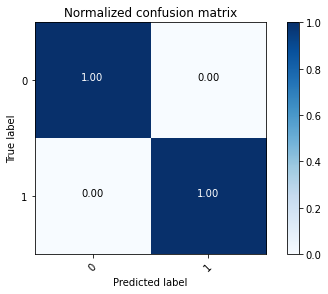

In [41]:
new_model = XGBClassifier()
new_model.set_params(**grid.best_params_)

new_model.fit(X_train, y_train)

y_pred = grid.best_estimator_.predict(X)
cm = confusion_matrix(train_data['Target'], y_pred)
np.set_printoptions(precision=2)

class_names = ['0', '1']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')

In [42]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)

def objective(trial):
    params = {
        'booster':trial.suggest_categorical('booster', ['gbtree', 'dart', 'gblinear']),
        'learning_rate':trial.suggest_loguniform("learning_rate", 0.01, 0.1),
        'max_depth':trial.suggest_int("max_depth", 3, 11),
        'subsample':trial.suggest_uniform("subsample", 0.0, 1.0),
        'colsample_bytree':trial.suggest_uniform("colsample_bytree", 0.0, 1.0),
    }
    
    bst = xgb.train(params, dtrain)
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    # accuracy = accuracy_score(y_test, pred_labels)
    f1_scores = f1_score(y_test, pred_labels)
    return f1_scores


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200, timeout=600)

[I 2022-01-26 11:05:39,464] A new study created in memory with name: no-name-d48e0254-3034-4a36-8de2-8c7d19d0897b
[I 2022-01-26 11:05:39,508] Trial 0 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'learning_rate': 0.011424072264122922, 'max_depth': 6, 'subsample': 0.6842228665320398, 'colsample_bytree': 0.616744947707027}. Best is trial 0 with value: 0.0.
[I 2022-01-26 11:05:39,587] Trial 1 finished with value: 0.16777041942604856 and parameters: {'booster': 'dart', 'learning_rate': 0.023521843629110407, 'max_depth': 9, 'subsample': 0.287351220447295, 'colsample_bytree': 0.3307567133015624}. Best is trial 1 with value: 0.16777041942604856.
[I 2022-01-26 11:05:39,663] Trial 2 finished with value: 0.22964509394572027 and parameters: {'booster': 'gbtree', 'learning_rate': 0.02813783423177772, 'max_depth': 8, 'subsample': 0.36794925220343844, 'colsample_bytree': 0.6898262636772899}. Best is trial 2 with value: 0.22964509394572027.


[11:05:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-26 11:05:39,765] Trial 3 finished with value: 0.30654205607476637 and parameters: {'booster': 'gbtree', 'learning_rate': 0.01715712084878556, 'max_depth': 8, 'subsample': 0.6852996947914872, 'colsample_bytree': 0.9505483952652417}. Best is trial 3 with value: 0.30654205607476637.
[I 2022-01-26 11:05:39,796] Trial 4 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'learning_rate': 0.011983399321254288, 'max_depth': 4, 'subsample': 0.1847157756989567, 'colsample_bytree': 0.28981146536631275}. Best is trial 3 with value: 0.30654205607476637.
[I 2022-01-26 11:05:39,841] Trial 5 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'learning_rate': 0.015490511562557504, 'max_depth': 3, 'subsample': 0.7376284935678143, 'colsample_bytree': 0.7584129288094412}. Best is trial 3 with value: 0.30654205607476637.
[I 2022-01-26 11:05:39,901] Trial 6 finished with value: 0.0 and parameters: {'booster': 'dart', 'learning_rate': 0.06979154779471769, 'max_depth': 11, '

[11:05:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-26 11:05:40,188] Trial 10 finished with value: 0.33554817275747506 and parameters: {'booster': 'dart', 'learning_rate': 0.01975597630887862, 'max_depth': 10, 'subsample': 0.9805000586143136, 'colsample_bytree': 0.9822151555662886}. Best is trial 10 with value: 0.33554817275747506.
[I 2022-01-26 11:05:40,346] Trial 11 finished with value: 0.3076923076923077 and parameters: {'booster': 'dart', 'learning_rate': 0.019863155002992978, 'max_depth': 10, 'subsample': 0.9769144868072813, 'colsample_bytree': 0.9725643786467553}. Best is trial 10 with value: 0.33554817275747506.
[I 2022-01-26 11:05:40,517] Trial 12 finished with value: 0.33722871452420705 and parameters: {'booster': 'dart', 'learning_rate': 0.0400817945309638, 'max_depth': 11, 'subsample': 0.9992317559974925, 'colsample_bytree': 0.8725514110088023}. Best is trial 12 with value: 0.33722871452420705.
[I 2022-01-26 11:05:40,677] Trial 13 finished with value: 0.31261101243339257 and parameters: {'booster': 'dart', 'learnin

[11:05:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-26 11:05:41,500] Trial 20 finished with value: 0.17078651685393256 and parameters: {'booster': 'dart', 'learning_rate': 0.021560448645949165, 'max_depth': 7, 'subsample': 0.7896495467363432, 'colsample_bytree': 0.4675921624423541}. Best is trial 12 with value: 0.33722871452420705.
[I 2022-01-26 11:05:41,668] Trial 21 finished with value: 0.3339191564147628 and parameters: {'booster': 'dart', 'learning_rate': 0.04504021397968185, 'max_depth': 10, 'subsample': 0.9016816229889977, 'colsample_bytree': 0.8701047569343918}. Best is trial 12 with value: 0.33722871452420705.
[I 2022-01-26 11:05:41,842] Trial 22 finished with value: 0.28371278458844135 and parameters: {'booster': 'dart', 'learning_rate': 0.04958688101634371, 'max_depth': 10, 'subsample': 0.9015499229997285, 'colsample_bytree': 0.9328587066997286}. Best is trial 12 with value: 0.33722871452420705.
[I 2022-01-26 11:05:42,016] Trial 23 finished with value: 0.3299319727891156 and parameters: {'booster': 'dart', 'learning

[11:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-26 11:05:42,448] Trial 27 finished with value: 0.2830188679245283 and parameters: {'booster': 'dart', 'learning_rate': 0.02786485910171993, 'max_depth': 11, 'subsample': 0.9301749291733941, 'colsample_bytree': 0.5527591780306274}. Best is trial 12 with value: 0.33722871452420705.
[I 2022-01-26 11:05:42,580] Trial 28 finished with value: 0.2434077079107505 and parameters: {'booster': 'dart', 'learning_rate': 0.044141751740800705, 'max_depth': 6, 'subsample': 0.5866592325829929, 'colsample_bytree': 0.997053637084155}. Best is trial 12 with value: 0.33722871452420705.
[I 2022-01-26 11:05:42,616] Trial 29 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'learning_rate': 0.010312779695166968, 'max_depth': 10, 'subsample': 0.7112526275167537, 'colsample_bytree': 0.8968107563055232}. Best is trial 12 with value: 0.33722871452420705.
[I 2022-01-26 11:05:42,724] Trial 30 finished with value: 0.16481069042316257 and parameters: {'booster': 'dart', 'learning_rate': 0.01

[11:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-26 11:05:42,920] Trial 31 finished with value: 0.3481228668941979 and parameters: {'booster': 'dart', 'learning_rate': 0.07948099804817763, 'max_depth': 11, 'subsample': 0.9888980304515552, 'colsample_bytree': 0.8387093924191594}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:43,085] Trial 32 finished with value: 0.3217993079584775 and parameters: {'booster': 'dart', 'learning_rate': 0.0748391551791035, 'max_depth': 11, 'subsample': 0.8479683730957969, 'colsample_bytree': 0.8110062795616344}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:43,216] Trial 33 finished with value: 0.2815356489945155 and parameters: {'booster': 'dart', 'learning_rate': 0.0644030450097683, 'max_depth': 9, 'subsample': 0.963847013411609, 'colsample_bytree': 0.7282924076347685}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:43,396] Trial 34 finished with value: 0.3402777777777778 and parameters: {'booster': 'dart', 'learning_rate': 0

[11:05:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-26 11:05:43,855] Trial 38 finished with value: 0.27124773960216997 and parameters: {'booster': 'dart', 'learning_rate': 0.013009460996684591, 'max_depth': 11, 'subsample': 0.6637697792804124, 'colsample_bytree': 0.8135841238983139}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:44,012] Trial 39 finished with value: 0.312280701754386 and parameters: {'booster': 'dart', 'learning_rate': 0.059769468559848805, 'max_depth': 10, 'subsample': 0.9418572199971462, 'colsample_bytree': 0.9459701676905843}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:44,133] Trial 40 finished with value: 0.29050279329608936 and parameters: {'booster': 'dart', 'learning_rate': 0.08758341177187458, 'max_depth': 8, 'subsample': 0.4112338323639252, 'colsample_bytree': 0.9952702397839119}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:44,282] Trial 41 finished with value: 0.3221238938053097 and parameters: {'booster': 'dart', 'learning_ra

[11:05:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-26 11:05:45,429] Trial 51 finished with value: 0.32291666666666663 and parameters: {'booster': 'dart', 'learning_rate': 0.07774223125268484, 'max_depth': 11, 'subsample': 0.9994842489111697, 'colsample_bytree': 0.871416424314411}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:45,586] Trial 52 finished with value: 0.30985915492957744 and parameters: {'booster': 'dart', 'learning_rate': 0.06973453031264794, 'max_depth': 11, 'subsample': 0.9056996674075197, 'colsample_bytree': 0.7936465732336857}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:45,742] Trial 53 finished with value: 0.3368421052631579 and parameters: {'booster': 'dart', 'learning_rate': 0.09685659685777795, 'max_depth': 10, 'subsample': 0.9721860444535098, 'colsample_bytree': 0.910706056036009}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:45,894] Trial 54 finished with value: 0.31150442477876106 and parameters: {'booster': 'dart', 'learning_rat

[11:05:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-26 11:05:47,518] Trial 67 finished with value: 0.3045112781954887 and parameters: {'booster': 'dart', 'learning_rate': 0.030135915617711544, 'max_depth': 8, 'subsample': 0.5293103783836466, 'colsample_bytree': 0.9215773058441717}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:47,682] Trial 68 finished with value: 0.2991304347826087 and parameters: {'booster': 'dart', 'learning_rate': 0.07179453353693414, 'max_depth': 11, 'subsample': 0.8515808444341754, 'colsample_bytree': 0.8388826773667799}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:47,782] Trial 69 finished with value: 0.23600000000000002 and parameters: {'booster': 'dart', 'learning_rate': 0.026287896643670206, 'max_depth': 7, 'subsample': 0.31342303970964547, 'colsample_bytree': 0.9008003834597228}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:47,876] Trial 70 finished with value: 0.243614931237721 and parameters: {'booster': 'dart', 'learning_rat

[11:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-26 11:05:49,130] Trial 79 finished with value: 0.30397236614853196 and parameters: {'booster': 'dart', 'learning_rate': 0.0904244124152309, 'max_depth': 10, 'subsample': 0.9512638229189765, 'colsample_bytree': 0.8983216307101751}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:49,286] Trial 80 finished with value: 0.328042328042328 and parameters: {'booster': 'dart', 'learning_rate': 0.06377362217817292, 'max_depth': 11, 'subsample': 0.7923894985686553, 'colsample_bytree': 0.814083878218128}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:49,448] Trial 81 finished with value: 0.33212996389891697 and parameters: {'booster': 'dart', 'learning_rate': 0.012160537253200397, 'max_depth': 11, 'subsample': 0.814428508375313, 'colsample_bytree': 0.829979102914661}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:49,622] Trial 82 finished with value: 0.3121783876500857 and parameters: {'booster': 'dart', 'learning_rate':

[11:05:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-26 11:05:51,955] Trial 98 finished with value: 0.33797909407665505 and parameters: {'booster': 'dart', 'learning_rate': 0.06901421973141174, 'max_depth': 9, 'subsample': 0.8868057331467887, 'colsample_bytree': 0.9391901392354042}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:52,100] Trial 99 finished with value: 0.31040564373897706 and parameters: {'booster': 'dart', 'learning_rate': 0.07609631149971371, 'max_depth': 9, 'subsample': 0.8954851604143378, 'colsample_bytree': 0.9502632183108682}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:52,239] Trial 100 finished with value: 0.3065953654188948 and parameters: {'booster': 'dart', 'learning_rate': 0.086816926365066, 'max_depth': 9, 'subsample': 0.9188432097771118, 'colsample_bytree': 0.889933565356765}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:52,396] Trial 101 finished with value: 0.3315508021390374 and parameters: {'booster': 'dart', 'learning_rate':

[11:05:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-26 11:05:54,744] Trial 118 finished with value: 0.3177892918825561 and parameters: {'booster': 'dart', 'learning_rate': 0.061106651546446636, 'max_depth': 11, 'subsample': 0.9198119906744069, 'colsample_bytree': 0.8553518890934}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:54,860] Trial 119 finished with value: 0.2784313725490196 and parameters: {'booster': 'dart', 'learning_rate': 0.09525452209266158, 'max_depth': 7, 'subsample': 0.7230313921831101, 'colsample_bytree': 0.9372875545657442}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:55,023] Trial 120 finished with value: 0.3069139966273187 and parameters: {'booster': 'dart', 'learning_rate': 0.032260812385808066, 'max_depth': 10, 'subsample': 0.9601750799297816, 'colsample_bytree': 0.9796544318402519}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:55,196] Trial 121 finished with value: 0.3178807947019867 and parameters: {'booster': 'dart', 'learning_ra

[11:05:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-26 11:05:57,856] Trial 139 finished with value: 0.34103019538188273 and parameters: {'booster': 'dart', 'learning_rate': 0.013555660988004791, 'max_depth': 10, 'subsample': 0.7446775226004391, 'colsample_bytree': 0.9560984376261275}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:58,016] Trial 140 finished with value: 0.3137254901960784 and parameters: {'booster': 'dart', 'learning_rate': 0.014144706849035123, 'max_depth': 10, 'subsample': 0.7963230204849308, 'colsample_bytree': 0.9577787265006652}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:58,176] Trial 141 finished with value: 0.336283185840708 and parameters: {'booster': 'dart', 'learning_rate': 0.013209346442006938, 'max_depth': 10, 'subsample': 0.7460837167025646, 'colsample_bytree': 0.9775703512069341}. Best is trial 31 with value: 0.3481228668941979.
[I 2022-01-26 11:05:58,330] Trial 142 finished with value: 0.29981718464351004 and parameters: {'booster': 'dart', 'learn

[I 2022-01-26 11:06:01,991] Trial 166 finished with value: 0.32974910394265233 and parameters: {'booster': 'dart', 'learning_rate': 0.08906658753800809, 'max_depth': 10, 'subsample': 0.7904606535295403, 'colsample_bytree': 0.9729727494562528}. Best is trial 154 with value: 0.3498233215547703.
[I 2022-01-26 11:06:02,146] Trial 167 finished with value: 0.2877442273534636 and parameters: {'booster': 'dart', 'learning_rate': 0.03738908722516443, 'max_depth': 10, 'subsample': 0.8634760799488866, 'colsample_bytree': 0.8792158156362828}. Best is trial 154 with value: 0.3498233215547703.
[I 2022-01-26 11:06:02,299] Trial 168 finished with value: 0.3018181818181818 and parameters: {'booster': 'dart', 'learning_rate': 0.05345885157269113, 'max_depth': 10, 'subsample': 0.7173669022402294, 'colsample_bytree': 0.9304121983251377}. Best is trial 154 with value: 0.3498233215547703.
[I 2022-01-26 11:06:02,332] Trial 169 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'learning_rate': 

[11:06:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-01-26 11:06:02,496] Trial 170 finished with value: 0.313588850174216 and parameters: {'booster': 'dart', 'learning_rate': 0.013519522583896326, 'max_depth': 10, 'subsample': 0.8323975724144405, 'colsample_bytree': 0.980199031388242}. Best is trial 154 with value: 0.3498233215547703.
[I 2022-01-26 11:06:02,660] Trial 171 finished with value: 0.3527336860670193 and parameters: {'booster': 'dart', 'learning_rate': 0.013166673635867881, 'max_depth': 11, 'subsample': 0.8168318418208207, 'colsample_bytree': 0.8503182704149526}. Best is trial 171 with value: 0.3527336860670193.
[I 2022-01-26 11:06:02,829] Trial 172 finished with value: 0.3018181818181818 and parameters: {'booster': 'dart', 'learning_rate': 0.012948644102209689, 'max_depth': 11, 'subsample': 0.8049580252563902, 'colsample_bytree': 0.8471600988835493}. Best is trial 171 with value: 0.3527336860670193.
[I 2022-01-26 11:06:02,998] Trial 173 finished with value: 0.3350427350427351 and parameters: {'booster': 'dart', 'learn

[I 2022-01-26 11:06:06,853] Trial 197 finished with value: 0.333843797856049 and parameters: {'booster': 'dart', 'learning_rate': 0.013274706775473629, 'max_depth': 11, 'subsample': 0.9971433797576239, 'colsample_bytree': 0.9548489279693334}. Best is trial 171 with value: 0.3527336860670193.
[I 2022-01-26 11:06:07,033] Trial 198 finished with value: 0.3220858895705521 and parameters: {'booster': 'dart', 'learning_rate': 0.013392504165912159, 'max_depth': 11, 'subsample': 0.9995928587570918, 'colsample_bytree': 0.9426567112095209}. Best is trial 171 with value: 0.3527336860670193.
[I 2022-01-26 11:06:07,234] Trial 199 finished with value: 0.3142389525368249 and parameters: {'booster': 'dart', 'learning_rate': 0.014031967954628693, 'max_depth': 11, 'subsample': 0.9610034822137284, 'colsample_bytree': 0.9568253286809626}. Best is trial 171 with value: 0.3527336860670193.


In [43]:
new_params = study.best_params

new_model2 = XGBClassifier(**new_params)
new_model2.fit(X, y)
preds = new_model2.predict(X_test)

print('Optimized SuperLearner accuracy: ', accuracy_score(y_test, preds))
print('Optimized SuperLearner f1-score: ', f1_score(y_test, preds))

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

C:\Users\u1-510\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Optimized SuperLearner accuracy:  0.9546783625730995
Optimized SuperLearner f1-score:  0.6858108108108109
Number of finished trials:  200
Best trial:
  Value: 0.3527336860670193
  Params: 
    booster: dart
    learning_rate: 0.013166673635867881
    max_depth: 11
    subsample: 0.8168318418208207
    colsample_bytree: 0.8503182704149526


In [44]:
all_accuracies = cross_val_score(estimator=new_model, X=X_train, y=y_train, cv=3)

print("\n\nAccuracy is the measure of how often the model is correct.\n")

print("All of accuracies are \n", all_accuracies)
print("\nMean of accuracies \n", all_accuracies.mean())
print("\nStandart deviation of accuracies \n %", ( all_accuracies.std() * 100))

C:\Users\u1-510\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\u1-510\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\u1-510\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy is the measure of how often the model is correct.

All of accuracies are 
 [0.91 0.9  0.91]

Mean of accuracies 
 0.904030910609858

Standart deviation of accuracies 
 % 0.30517208012118596


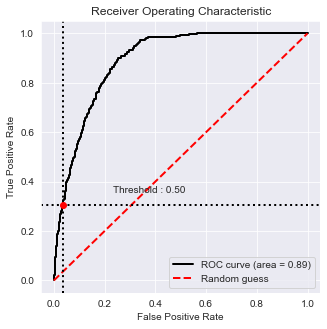

In [45]:
# Use predict_proba to predict probability of the class
y_pred = new_model.predict_proba(X_test)[:,1]

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [48]:
results=pd.DataFrame()
results['columns']=X.columns
results['importances'] = new_model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[:20]

,columns,importances
78,CR_inst_open_segment_101150,0.047350
9,CR_open_reg,0.035215
23,CPC_segment_081090,0.034821
6,Reg_cost,0.030327
77,CR_inst_open_segment_000100,0.030180
65,CTR_cost_segment_141150,0.025934
54,CTR_cost_segment_031040,0.024297
79,CR_inst_open_segment_151200,0.024222
45,Reg_cost_segment_501601,0.022773
64,CTR_cost_segment_131140,0.022705


In [85]:
# save in JSON format
new_model.save_model("model_sklearn.json")

In [87]:
model2 = xgb.XGBClassifier()
model2.load_model("model_sklearn.json")

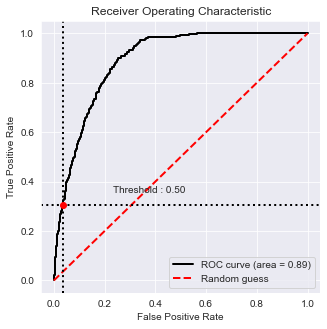

In [88]:
# Use predict_proba to predict probability of the class
y_pred = model2.predict_proba(X_test)[:,1]

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [90]:
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))

0.9546783625730995
[[3715   11]
 [ 175  203]]
